In [1]:
# import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Get input data and store
data = pd.read_csv("/content/uber_sampled_train.csv")
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,13112538,2013-09-12 19:48:00.00000048,14.5,2013-09-12 19:48:00 UTC,-73.963927,40.776715,-73.981230,40.744362,5
1,27522324,2013-08-22 21:51:33.0000001,18.5,2013-08-22 21:51:33 UTC,-73.987196,40.720433,-73.979128,40.772561,1
2,26162875,2009-05-11 18:46:00.000000173,5.3,2009-05-11 18:46:00 UTC,-73.989912,40.751997,-73.977732,40.748800,1
3,5707300,2009-11-17 20:52:54.0000003,10.5,2009-11-17 20:52:54 UTC,-73.987425,40.741593,-73.958254,40.772870,1
4,43561908,2011-07-14 20:33:39.0000003,16.1,2011-07-14 20:33:39 UTC,-73.978324,40.745629,-73.994166,40.703158,1


In [3]:
# Dropping unwanted columns.
data = data.drop(['Unnamed: 0'], axis = 1)
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2013-09-12 19:48:00.00000048,14.5,2013-09-12 19:48:00+00:00,-73.963927,40.776715,-73.981230,40.744362,5
1,2013-08-22 21:51:33.0000001,18.5,2013-08-22 21:51:33+00:00,-73.987196,40.720433,-73.979128,40.772561,1
2,2009-05-11 18:46:00.000000173,5.3,2009-05-11 18:46:00+00:00,-73.989912,40.751997,-73.977732,40.748800,1
3,2009-11-17 20:52:54.0000003,10.5,2009-11-17 20:52:54+00:00,-73.987425,40.741593,-73.958254,40.772870,1
4,2011-07-14 20:33:39.0000003,16.1,2011-07-14 20:33:39+00:00,-73.978324,40.745629,-73.994166,40.703158,1


In [4]:
#Checking for null values.
data.isnull().sum()


key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [5]:
# Drop rows with NaN values in the original DataFrame
data.dropna(axis=0, inplace=True)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                70000 non-null  object             
 1   fare_amount        70000 non-null  float64            
 2   pickup_datetime    70000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   70000 non-null  float64            
 4   pickup_latitude    70000 non-null  float64            
 5   dropoff_longitude  70000 non-null  float64            
 6   dropoff_latitude   70000 non-null  float64            
 7   passenger_count    70000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 4.3+ MB


In [7]:
# Tagging the data with time_of_day.
bins = [-1, 5, 11, 17, 23]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
pickup_hour = data['pickup_datetime'].dt.hour
data['time_of_day'] = pd.cut(pickup_hour, bins=bins, labels=labels)
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,time_of_day
0,2013-09-12 19:48:00.00000048,14.5,2013-09-12 19:48:00+00:00,-73.963927,40.776715,-73.981230,40.744362,5,Evening
1,2013-08-22 21:51:33.0000001,18.5,2013-08-22 21:51:33+00:00,-73.987196,40.720433,-73.979128,40.772561,1,Evening
2,2009-05-11 18:46:00.000000173,5.3,2009-05-11 18:46:00+00:00,-73.989912,40.751997,-73.977732,40.748800,1,Evening
3,2009-11-17 20:52:54.0000003,10.5,2009-11-17 20:52:54+00:00,-73.987425,40.741593,-73.958254,40.772870,1,Evening
4,2011-07-14 20:33:39.0000003,16.1,2011-07-14 20:33:39+00:00,-73.978324,40.745629,-73.994166,40.703158,1,Evening


In [8]:
# Determine weekend or weekday using weekday() method
data['day_of_week'] = data['pickup_datetime'].dt.weekday
# Map the day_of_week values to 'Weekend' or 'Weekday'
data['day_type'] = data['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,time_of_day,day_of_week,day_type
0,2013-09-12 19:48:00.00000048,14.5,2013-09-12 19:48:00+00:00,-73.963927,40.776715,-73.981230,40.744362,5,Evening,3,Weekday
1,2013-08-22 21:51:33.0000001,18.5,2013-08-22 21:51:33+00:00,-73.987196,40.720433,-73.979128,40.772561,1,Evening,3,Weekday
2,2009-05-11 18:46:00.000000173,5.3,2009-05-11 18:46:00+00:00,-73.989912,40.751997,-73.977732,40.748800,1,Evening,0,Weekday
3,2009-11-17 20:52:54.0000003,10.5,2009-11-17 20:52:54+00:00,-73.987425,40.741593,-73.958254,40.772870,1,Evening,1,Weekday
4,2011-07-14 20:33:39.0000003,16.1,2011-07-14 20:33:39+00:00,-73.978324,40.745629,-73.994166,40.703158,1,Evening,3,Weekday


In [9]:
#Observed that we can't relate fare with latitudes and longutides directly, so gonna derive distance between pickup and dropoff location.

from math import radians, sin, cos, sqrt, atan2

def haversine_distance(row):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    radius_of_earth = 6371  # Radius of Earth in kilometers

    # Calculate the distance
    distance = radius_of_earth * c

    return distance


In [10]:
data['distance'] = data.apply(haversine_distance, axis=1)
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,time_of_day,day_of_week,day_type,distance
0,2013-09-12 19:48:00.00000048,14.5,2013-09-12 19:48:00+00:00,-73.963927,40.776715,-73.981230,40.744362,5,Evening,3,Weekday,3.881461
1,2013-08-22 21:51:33.0000001,18.5,2013-08-22 21:51:33+00:00,-73.987196,40.720433,-73.979128,40.772561,1,Evening,3,Weekday,5.836081
2,2009-05-11 18:46:00.000000173,5.3,2009-05-11 18:46:00+00:00,-73.989912,40.751997,-73.977732,40.748800,1,Evening,0,Weekday,1.085845
3,2009-11-17 20:52:54.0000003,10.5,2009-11-17 20:52:54+00:00,-73.987425,40.741593,-73.958254,40.772870,1,Evening,1,Weekday,4.258210
4,2011-07-14 20:33:39.0000003,16.1,2011-07-14 20:33:39+00:00,-73.978324,40.745629,-73.994166,40.703158,1,Evening,3,Weekday,4.907627


In [11]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day_of_week,distance
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,11.261658,-72.498630,39.950258,-72.508637,39.918108,1.693429,3.052200,19.484918
std,9.654077,10.881647,9.566680,10.544393,6.898035,1.319192,1.956444,366.145644
min,0.010000,-736.016667,-74.008928,-75.415770,-834.457250,0.000000,0.000000,0.000000
25%,6.000000,-73.992038,40.735181,-73.991315,40.734205,1.000000,1.000000,1.211642
50%,8.500000,-73.981690,40.752911,-73.980215,40.753299,1.000000,3.000000,2.121009
75%,12.500000,-73.967018,40.767330,-73.963817,40.768167,2.000000,5.000000,3.865663
max,247.000000,363.630298,1993.880665,405.566222,42.387233,6.000000,6.000000,8671.031676


fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
day_of_week             Axes(0.125,0.448049;0.352273x0.0939024)
distance             Axes(0.547727,0.448049;0.352273x0.0939024)
dtype: object

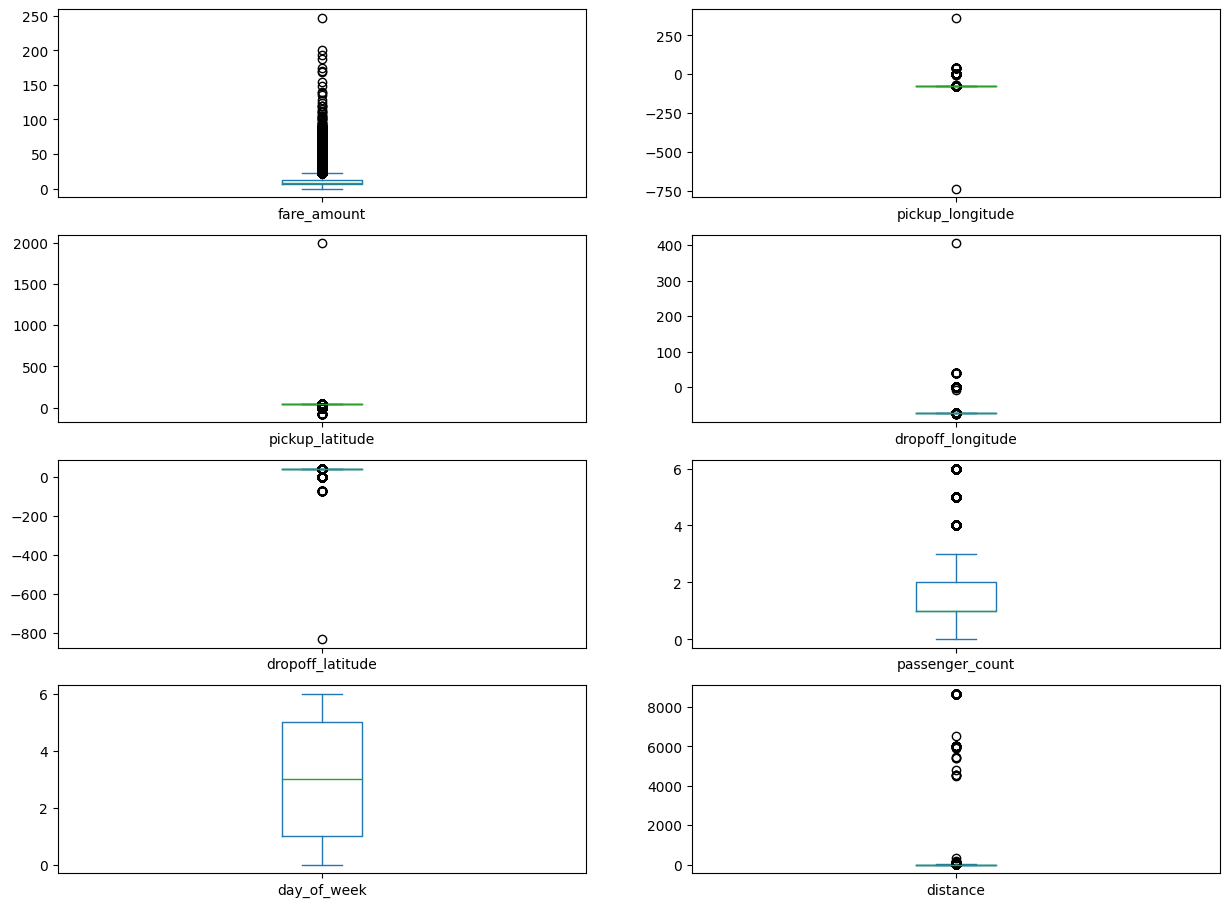

In [12]:
#Detect outliers
data.plot(kind = "box", subplots = True, layout = (7,2), figsize=(15,20))

In [13]:
import pandas as pd

# Assuming df is your DataFrame and columns_list is a list of column names with numeric data
columns_list = ['fare_amount', 'distance', 'passenger_count']

# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for all columns
df_no_outliers = data.copy()
for column in columns_list:
    df_no_outliers = remove_outliers_iqr(df_no_outliers, column)
# print(df_no_outliers.shape)


In [14]:
# Perform one-hot encoding
data_encoded = pd.get_dummies(df_no_outliers, columns=['time_of_day', 'day_type'])
data_encoded.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day_of_week,distance,time_of_day_Night,time_of_day_Morning,time_of_day_Afternoon,time_of_day_Evening,day_type_Weekday,day_type_Weekend
1,2013-08-22 21:51:33.0000001,18.5,2013-08-22 21:51:33+00:00,-73.987196,40.720433,-73.979128,40.772561,1,3,5.836081,0,0,0,1,1,0
2,2009-05-11 18:46:00.000000173,5.3,2009-05-11 18:46:00+00:00,-73.989912,40.751997,-73.977732,40.748800,1,0,1.085845,0,0,0,1,1,0
3,2009-11-17 20:52:54.0000003,10.5,2009-11-17 20:52:54+00:00,-73.987425,40.741593,-73.958254,40.772870,1,1,4.258210,0,0,0,1,1,0
4,2011-07-14 20:33:39.0000003,16.1,2011-07-14 20:33:39+00:00,-73.978324,40.745629,-73.994166,40.703158,1,3,4.907627,0,0,0,1,1,0
5,2011-05-14 14:09:00.00000053,6.9,2011-05-14 14:09:00+00:00,-73.995088,40.723277,-74.002212,40.740172,1,5,1.972209,0,0,1,0,0,1


In [15]:
#Drop unwanted columns
data = data_encoded.drop(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'day_of_week'], axis = 1)
data.head()

,fare_amount,passenger_count,distance,time_of_day_Night,time_of_day_Morning,time_of_day_Afternoon,time_of_day_Evening,day_type_Weekday,day_type_Weekend
1,18.5,1,5.836081,0,0,0,1,1,0
2,5.3,1,1.085845,0,0,0,1,1,0
3,10.5,1,4.258210,0,0,0,1,1,0
4,16.1,1,4.907627,0,0,0,1,1,0
5,6.9,1,1.972209,0,0,1,0,0,1


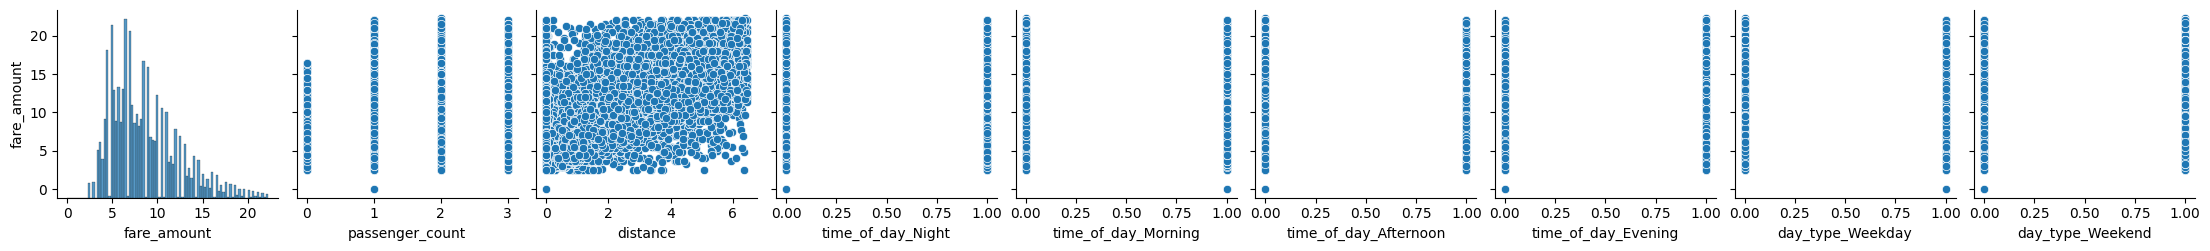

In [16]:
sns.pairplot(data, y_vars='fare_amount')

<Axes: >

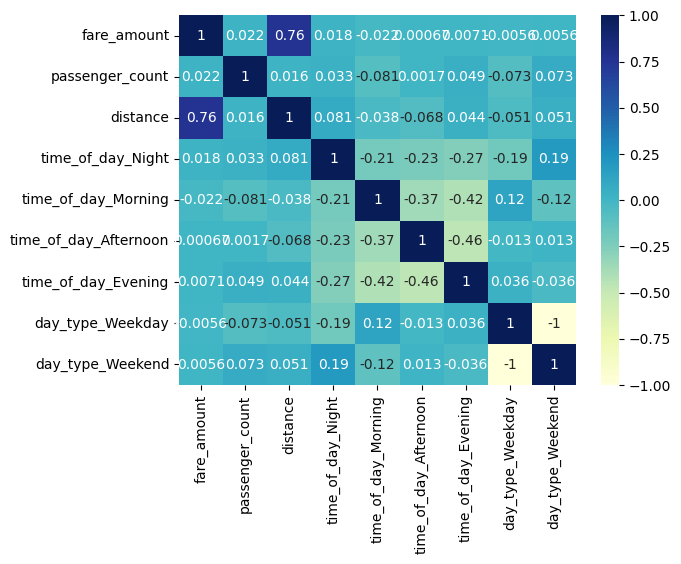

In [17]:
# correlation between the different variables
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True)

In [18]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_columns = [col for col in data.columns if col not in ["fare_amount"]]
# independent variables
x = data[x_columns]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data['feature'] = x.columns

# calculatinf VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif_data

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,passenger_count,1.011557
1,distance,1.013005
2,time_of_day_Night,inf
3,time_of_day_Morning,inf
4,time_of_day_Afternoon,inf
5,time_of_day_Evening,inf
6,day_type_Weekday,inf
7,day_type_Weekend,inf


In [19]:
from sklearn.model_selection import train_test_split
x_columns = [col for col in data.columns if col not in ["fare_amount"]]

x = data[x_columns]
y = data["fare_amount"]

X_train, X_test, y_train, y_test = train_test_split(x,y,train_size = 0.8, test_size=0.2, random_state=100)

In [24]:
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_const).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     9877.
Date:                Sun, 21 Jan 2024   Prob (F-statistic):               0.00
Time:                        11:00:25   Log-Likelihood:                -99522.
No. Observations:               43302   AIC:                         1.991e+05
Df Residuals:                   43295   BIC:                         1.991e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.2777      0.020    112.645      0.000       2.238       2.317
passenger_count           0.0869      0.021      4.044      0.000       0.045       0.129
distance                  1.9433      0.008    243.246      0.000       1.928       1.959
time_of_day_Night         0.2080      0.029      7.226      0.000       0.152       0.264
time_of_day_Morning       0.6681      0.021     31.447      0.000       0.626       0.710
time_of_day_Afternoon     0.9347      0.020     46.813      0.000       0.896       0.974
time_of_day_Evening       0.4669      0.019     24.137      0.000       0.429       0.505
day_type_Weekday          1.2534      0.015     84.413      0.000       1.224       1.283
day_type_Weekend          1.0243      0.018     56.204      0.000       0.989       1.060
==============================================================================
Omnibus:                    17030.944   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            96100.538
Skew:                           1.813   Prob(JB):                         0.00
Kurtosis:                       9.334   Cond. No.                     4.14e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.47e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

No need to remove any variable based on above summary as P value is 0.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

# Create a list of models
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]

# Iterate through each model
for model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))

    # Calculate R^2
    r2_value = r2_score(y_test, predictions)

    # Print the RMSE for each model
    print(f"For {type(model).__name__}, RMSE: {rmse} and R^2: {r2_value}")


For LinearRegression, RMSE: 2.430153850555854 and R^2: 0.5793884647429083
For DecisionTreeRegressor, RMSE: 3.2111843180552206 and R^2: 0.2655806529310176
For RandomForestRegressor, RMSE: 2.622466318929511 and R^2: 0.5101834231218292


**Conclusion**: Best suitable model is LinearRegression as it has lowest RMSE value and better R square value compared to other models.